# Building a stock price database#

In this notebook we will download historic data for all SPY symbols and build a database of prices. For this we will use HDF5 format which is supported by pandas. 

As an example let's take the [SPY components](https://www.spdrs.com/product/fund.seam?ticker=SPY). The excel sheet can be downloaded from [here](https://www.spdrs.com/site-content/xls/SPY_All_Holdings.xls?fund=SPY&docname=All+Holdings&onyx_code1=1286&onyx_code2=1700), or even better, download it automatically. The following piece of code will do just that, unless you're behind a proxy.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import urllib.request, urllib.parse, urllib.error
import os

fName = 'data/spy_holdings.xls'

if not os.path.exists('data'): os.mkdir('data') # create data directory if it does not exist
urllib.request.urlretrieve ("https://www.spdrs.com/site-content/xls/SPY_All_Holdings.xls?fund=SPY&docname=All+Holdings&onyx_code1=1286&onyx_code2=1700",
                             fName) # download xls file and save it to data directory




('data/spy_holdings.xls', <http.client.HTTPMessage at 0x7f927b9db588>)



Now we'll read the symbols from xls file. I have already taken a look at it and know that the data is contained in rows 5-505. The column names are *Name,Ticker,Weight,Sector,Shares Held*
We'll now parse this file in a similar way we parsed a csv file in the previous excersise, putting the relevant data to a `DataFrame`
 


In [3]:
import xlrd # module for excel file reading
import pandas as pd


wb = xlrd.open_workbook(fName) # open xls file, create a workbook
sh = wb.sheet_by_index(0) # select first sheet


data = {'name':[], 'symbol':[], 'weight':[],'sector':[]}
for rowNr  in range(5,505): # cycle through the rows
    v = sh.row_values(rowNr) # get all row values
    data['name'].append(v[0])
    data['symbol'].append(v[1]) # symbol is in the second column, append it to the list
    data['weight'].append(float(v[2]))
    data['sector'].append(v[3])
  
holdings = pd.DataFrame(data)    
holdings.head(10) # show first 10 rows 

,name,sector,symbol,weight
0,Microsoft Corporation,Information Technology,MSFT,2.437363
1,Exxon Mobil Corporation,Energy,XOM,2.027927
2,Johnson & Johnson,Health Care,JNJ,1.692270
3,General Electric Company,Industrials,GE,1.638537
4,Berkshire Hathaway Inc. Class B,Financials,BRK.B,1.442336
5,Facebook Inc. Class A,Information Technology,FB,1.437377
6,AT&T Inc.,Telecommunication Services,T,1.380180
7,Wells Fargo & Company,Financials,WFC,1.353252
8,Procter & Gamble Company,Consumer Staples,PG,1.343828
9,JPMorgan Chase & Co.,Financials,JPM,1.293189


A DataFrame can be saved to excel directly by using .to_excel() 

In [4]:
#holdings.to_excel('holdings.xls')

Now we've got all 500 symbols.

There is acutally a function in the TWP library that executes the process above:

In [5]:
import tradingWithPython.lib.extra as extra
holdings = extra.getSpyHoldings('data') # twp library contains a function to get current list of SPY holdings

File found, skipping download


A `DataFrame` can be used in to select data, providing basic database functionality. I will be working with the Health Care sector, but you can download all the symbols if you like.

In [6]:
# select only Health Care sector
healthCare = holdings[holdings['sector'] == 'Health Care']
healthCare

,name,sector,symbol,weight
2,Johnson & Johnson,Health Care,JNJ,1.692270
14,Pfizer Inc.,Health Care,PFE,1.090114
23,Merck & Co. Inc.,Health Care,MRK,0.839147
26,Gilead Sciences Inc.,Health Care,GILD,0.746427
32,Amgen Inc.,Health Care,AMGN,0.665549
33,Allergan plc,Health Care,AGN,0.655188
34,UnitedHealth Group Incorporated,Health Care,UNH,0.646546
37,Medtronic Plc,Health Care,MDT,0.636922
39,Bristol-Myers Squibb Company,Health Care,BMY,0.604013
42,AbbVie Inc.,Health Care,ABBV,0.527141


## Download historic data##

In [7]:
symbols = healthCare['symbol'].tolist()
print(symbols)

['JNJ', 'PFE', 'MRK', 'GILD', 'AMGN', 'AGN', 'UNH', 'MDT', 'BMY', 'ABBV', 'CELG', 'LLY', 'BIIB', 'ABT', 'TMO', 'ESRX', 'MCK', 'AET', 'CI', 'ANTM', 'ALXN', 'REGN', 'SYK', 'BDX', 'CAH', 'HUM', 'BSX', 'BXLT', 'HCA', 'VRTX', 'MYL', 'PRGO', 'BAX', 'ISRG', 'ILMN', 'ZTS', 'EW', 'CERN', 'ABC', 'ZBH', 'STJ', 'BCR', 'HSIC', 'A', 'ENDP', 'DVA', 'LH', 'UHS', 'WAT', 'DGX', 'XRAY', 'MNK', 'VAR', 'PKI', 'PDCO', 'THC']


these are the Health Care sector symbols. Don't worry about the 'u' berore a symbol, it only indicates that this is a unicode string.
We can now download data from Yahoo with the `yahooFinance` module

In [9]:
import tradingWithPython.lib.yahooFinance as yf


quote = yf.getQuote(symbols) # get current quote
quote.head(10) # show 10 first rows

,PE,change_pct,eps,last,market_cap,prev_close,short_ratio,time
JNJ,18.57,+1.18%,5.48,101.73,2.814800e+11,100.54,3.73,1:26pm
PFE,22.94,-1.86%,1.24,28.49,1.758700e+11,29.03,3.73,1:26pm
MRK,30.85,-2.53%,1.56,48.13,1.344500e+11,49.38,2.58,1:26pm
GILD,7.16,+0.20%,11.91,85.31,1.213100e+11,85.14,2.26,1:26pm
AMGN,15.52,-3.08%,9.06,140.57,1.059900e+11,145.04,2.45,1:26pm
AGN,24.24,-3.68%,10.88,263.73,1.039400e+11,273.80,1.78,1:26pm
UNH,18.22,-1.96%,6.01,109.53,1.059200e+11,111.72,2.60,1:26pm
MDT,41.05,-3.52%,1.75,71.84,1.010200e+11,74.46,2.45,1:26pm
BMY,61.60,+0.20%,0.97,59.75,9.968000e+10,59.63,3.28,1:26pm
ABBV,16.72,-1.51%,3.13,52.32,8.553000e+10,53.12,2.78,1:26pm


The `HistData` class of `yahooFinance` provides an easy way of downloading multiple prices. Please take a look at the code to see how it works. 
All OHLC prices are saved for each symbol in a [`Panel`](http://pandas.pydata.org/pandas-docs/version/0.10.1/dsintro.html#panel) container. 
For your convenience, the OHLC prices  are automatically adjusted for splits and dividends using the 

In [10]:

hData = yf.HistData() # create HistData class
hData.downloadData(symbols) # download symbols

 [*********************100%***********************]  56 of 56 complete

to get the prices from `HistData`, you can use the `getDataFrame` method with *close, open, high or low*:

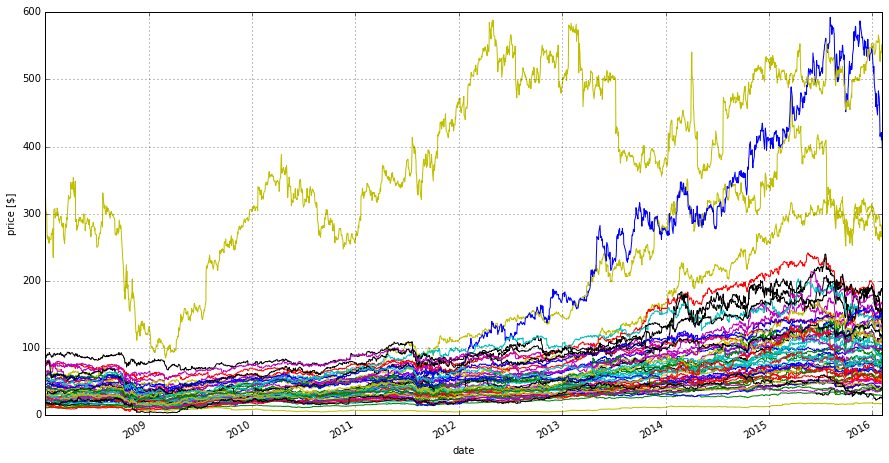

In [11]:
# plot the prices on a log scale
C = hData.getDataFrame('close') # getDataFrame of closing prices


figsize(15,8)
C.plot(grid=True, legend=False) # turning off the legend is wise here as it would take quite some space
xlabel('date')
ylabel('price [$]')

## Save data to file##

`HistData` class can save data to HDF5 for later use:


In [12]:
hData.save('data/healthcare.h5')

('Saving data to', 'data/healthcare.h5')


## Load data from file##

HDF5 data container is great for saving large datasets, because of its fast loading speed.
Reload data from file:

In [13]:
hData2 = yf.HistData() # new hist data class
hData2.load('data/healthcare.h5') # load from file


If you would like to update all the data, just call the `.downloadData()` method without parameters:

In [14]:
hData2.downloadData() # download all symbols
hData.save('data/healthcare.h5') # save again to disk

 [*********************100%***********************]  56 of 56 complete('Saving data to', 'data/healthcare.h5')


Now we have got a set of prices ready to play with.